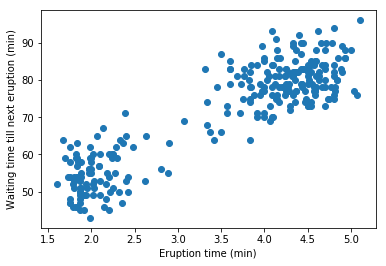

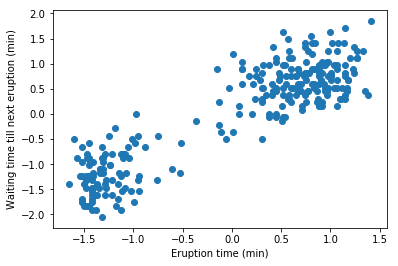

[[-0.4383619  -1.65247273]
 [-0.8808151  -1.90767808]]


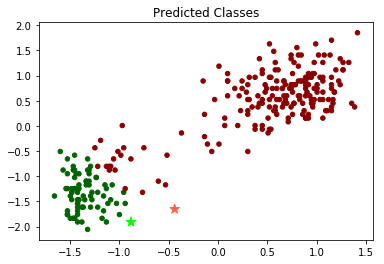

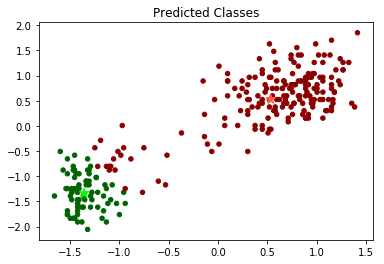

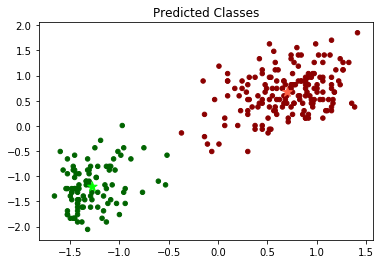

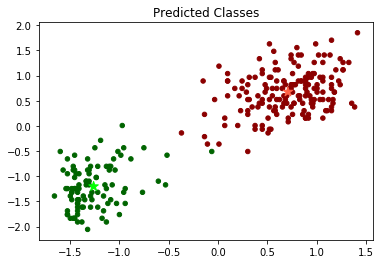

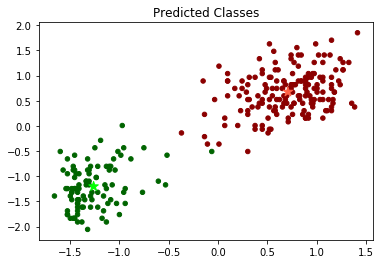

In [73]:
#problem_6
import numpy as np
import matplotlib.pyplot as plt


def plot(data):
    plt.scatter(*data.T)
    plt.xlabel('Eruption time (min)')
    plt.ylabel('Waiting time till next eruption (min)')
    plt.show()
    
def plot_classes(data, labels):
    plt.scatter(*data.T, c=np.where(labels, "darkgreen", "darkred"), s=20)
    plt.scatter(*centroids.T, c=["tomato", "lime"], s=100, marker='*')
    plt.title('Predicted Classes')
    plt.show()

def get_labels(data, centroids):
    dist_to_0 = np.linalg.norm(data - centroids[0], axis = 1)
    dist_to_1 = np.linalg.norm(data - centroids[1], axis = 1)
    dist = np.hstack([dist_to_0.reshape(272,1),dist_to_1.reshape(272,1)])
    label = np.argmin(dist, axis = 1)
    return label

def step(data, centroids, labels):
    labels = get_labels(data, centroids)
    mask = (labels == 0)
    c0 = data[mask].mean(axis = 0)
    mask = (labels == 1)
    c1 = data[mask].mean(axis = 0)
    d0 = np.linalg.norm(c0 - centroids[0])
    d1 = np.linalg.norm(c1 - centroids[1])
    centroids[0]= c0
    centroids[1]= c1
    return centroids, labels, d0, d1

#algorithm
data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]
plot(data)
data = data - data.mean(axis = 0)
data = data/data.std(axis = 0)
plot(data)
centroids = np.random.uniform(-2, 2, 4).reshape((2, 2))
print(centroids)
labels = get_labels(data, centroids)
plot_classes(data, labels)
d0 = 1
d1 = 1
while(max(d0,d1)>0.00000000001):
    centroids, labels, d0, d1 = step(data, centroids, labels)
    plot_classes(data, labels)
